<a href="https://colab.research.google.com/github/paulgureghian/Google_Colab_Notebooks/blob/master/Neural_network_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Created by Paul A. Gureghian on 11/21/18. **

** This PyTorch notebook uses the MNIST dataset, **
** from the Torchvision package, **
** to build a deep neural network **

In [136]:
### install pytorch and torchvision and helper

!pip3 install -U -q http://download.pytorch.org/whl/cu92/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
!pip3 install -U -q torchvision 
!pip3 install -U -q helper

tcmalloc: large alloc 1073750016 bytes == 0x57560000 @  0x7f7cdb0172a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [0]:
### import packages

import torch
import helper
import numpy as np
import matplotlib.pyplot as plt

from collections import OrderedDict
from torchvision import  datasets, transforms 

In [0]:
### define a transform to normalize the data

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,)),])  

In [139]:
### download and load the training data

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
print("trainset: ", trainset)
print('')

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
print("trainloader: ", trainloader)

trainset:  Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: /root/.pytorch/MNIST_data/
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5,), std=(0.5,))
                         )
    Target Transforms (if any): None

trainloader:  <torch.utils.data.dataloader.DataLoader object at 0x7f164b82d588>


In [140]:
### create an iterator with 'trainloader'

dataiter = iter(trainloader)
images, labels = dataiter.next()

print("datatype of images: ", (type(images))) 
print('')
print("shape of images: ", images.shape)
print('')
print("shape of labels: ", labels.shape)   

datatype of images:  <class 'torch.Tensor'>

shape of images:  torch.Size([64, 1, 28, 28])

shape of labels:  torch.Size([64])


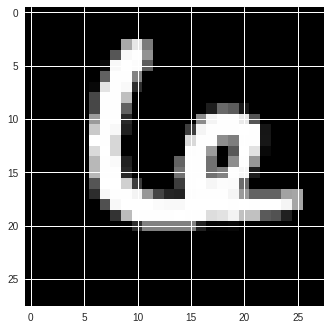

In [141]:
### plot an image 

plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [0]:
### define a sigmoid activation function

def sigmoid(x):
    return 1 / (1 + torch.exp(-x)) 

In [143]:
### flatten the input images 

inputs = images.view(images.shape[0], -1)
print("inputs: ", inputs)  
print('')
print("shape of inputs: ", inputs.shape) 

inputs:  tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])

shape of inputs:  torch.Size([64, 784])


In [144]:
### create parameters

w1 = torch.randn(784, 256)
print("w1: ", w1) 
print("shape of w1: ", w1.shape)
print('')

b1 = torch.randn(256) 
print("b1: ", b1)
print("shape of b1: ", b1.shape) 
print('')

w2 = torch.randn(256, 10)
print("w2: ", w2)
print("shape of w2: ", w2.shape)
print('')

b2 = torch.randn(10)
print("b2: ", b2)
print("shape of b2: ", b2.shape)  
print('')

hidden_layer = sigmoid(torch.mm(inputs, w1) + b1)
print("h: ", hidden_layer)
print("shape of h: ", hidden_layer.shape)
print('')

output_layer = torch.mm(hidden_layer, w2) + b2
print("output: ", output_layer)
print("shape of output: ", output_layer.shape)  

w1:  tensor([[ 0.5542,  1.1192,  1.3255,  ..., -0.5886, -0.5971,  0.7853],
        [-1.1387, -0.2712,  1.2155,  ...,  0.7184,  0.4655, -0.0274],
        [ 1.2081, -0.6354, -0.4101,  ..., -0.2509, -0.6757, -1.3447],
        ...,
        [-1.2878,  1.3005,  0.5847,  ...,  0.9735,  0.2870,  1.1535],
        [-1.2289,  0.7048,  0.6144,  ..., -0.3104,  0.1162, -0.2544],
        [ 0.1503, -0.1557, -0.8119,  ...,  1.5257, -0.4296,  0.9666]])
shape of w1:  torch.Size([784, 256])

b1:  tensor([ 1.7192,  1.2264, -0.2224, -0.1382,  0.9928,  1.2248, -1.0241, -0.0246,
         0.4848, -0.3819,  0.7717, -0.4028, -1.7129, -0.3858, -0.3289,  1.1575,
         1.5614,  0.3105,  0.4265, -0.4125,  0.4519,  0.8014, -1.1015, -1.9757,
        -1.5486, -0.9962,  2.1693,  0.0048,  1.2996, -1.8837,  0.0698,  0.3138,
         0.9798, -0.7421, -0.9639, -1.4858,  0.5091,  0.3485,  0.0302,  0.9235,
         1.5319, -0.8577, -0.7936, -0.5507,  0.3849,  0.0980,  2.0498,  0.0309,
         0.1728,  0.4624, -1.3288, -0.

In [145]:
### define a softmax activation function

def softmax(x):
  return torch.exp(x) / torch.sum(torch.exp(x), dim=1).view(-1, 1) 

probabilities = softmax(output_layer) 
print("sum of probabilities tensor:\n ", probabilities.sum(dim=1))
print('')
print("probabilities tensor:\n ", probabilities)
print('')
print("shape of probabilities tensor: ", probabilities.shape)
print('')
print("datatype of probabilities tensor: ", type(probabilities)) 

sum of probabilities tensor:
  tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])

probabilities tensor:
  tensor([[1.7655e-04, 6.5248e-03, 3.4700e-12, 1.0282e-04, 2.0345e-06, 1.3647e-07,
         2.3311e-06, 9.9319e-01, 5.0820e-13, 4.5660e-14],
        [1.6086e-06, 5.4822e-01, 1.6978e-01, 2.6802e-04, 2.8101e-01, 3.5351e-12,
         2.9872e-09, 7.1545e-04, 2.2145e-12, 8.7925e-15],
        [1.8824e-04, 2.8187e-02, 3.4106e-04, 3.1239e-06, 7.8684e-03, 6.2642e-06,
        

**This section builds the same network as above,**

**But it uses the PyTorch 'nn' module for simplicity.**

In [0]:
### build a network with torch.nn

### import torch.nn

from torch import  nn
import torch.nn.functional as F 

In [0]:
### define a class named 'Network'

class Network(nn.Module):
    def __init__(self):
       super().__init__()
    
       # inputs to hidden layer
       self.hidden1 = nn.Linear(784, 128)
       self.hidden2 = nn.Linear(128, 64) 
       # output layer 
       self.output = nn.Linear(64, 10) 
    
       # define sigmoid activation function and softmax output function
       self.relu = nn.ReLU()  
       self.sigmoid = nn.Sigmoid() 
       self.softmax = nn.Softmax(dim=1) 
        
        
    ### pass the input tensor (x) through each operation
    def forward(self, x):
        # hidden layer with sigmoid activtion function 
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        # output layer with softmax activation function
        x = F.softmax(self.output(x), dim=1) 
        
        return x  

In [148]:
### create a network object 

model = Network() 
model 

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

**Initializing weights and biases.**

In [149]:
### print the weights and biases (automatically initialized)

print("weights:\n ", model.hidden1.weight)
print("biases:\n ", model.hidden1.bias)   

weights:
  Parameter containing:
tensor([[-0.0241, -0.0169,  0.0115,  ...,  0.0023,  0.0098,  0.0296],
        [ 0.0177,  0.0268,  0.0172,  ..., -0.0311,  0.0053,  0.0206],
        [-0.0175, -0.0330,  0.0071,  ..., -0.0097,  0.0022, -0.0077],
        ...,
        [-0.0249,  0.0210, -0.0095,  ...,  0.0069, -0.0215, -0.0009],
        [ 0.0262, -0.0184, -0.0054,  ..., -0.0190,  0.0010,  0.0185],
        [-0.0298, -0.0039, -0.0310,  ...,  0.0327,  0.0222,  0.0332]],
       requires_grad=True)
biases:
  Parameter containing:
tensor([-0.0281,  0.0238, -0.0347, -0.0219,  0.0026,  0.0327, -0.0242, -0.0197,
         0.0330, -0.0266, -0.0186,  0.0201,  0.0139,  0.0075, -0.0111, -0.0243,
         0.0256,  0.0279,  0.0193,  0.0300, -0.0275, -0.0225, -0.0073,  0.0085,
         0.0228,  0.0139,  0.0106,  0.0246,  0.0152, -0.0114,  0.0225, -0.0303,
        -0.0254, -0.0142, -0.0044,  0.0087, -0.0184,  0.0220, -0.0308, -0.0000,
         0.0043,  0.0026,  0.0245,  0.0199,  0.0182,  0.0037,  0.0043,  0.

In [150]:
### print the weights (custom initialization)

model.hidden1.weight.data.normal_(std=0.01) 

tensor([[ 0.0161,  0.0056, -0.0059,  ..., -0.0100,  0.0120, -0.0049],
        [-0.0066,  0.0051,  0.0017,  ...,  0.0089, -0.0283, -0.0221],
        [ 0.0034, -0.0074, -0.0192,  ...,  0.0002, -0.0168,  0.0004],
        ...,
        [-0.0133,  0.0099, -0.0120,  ...,  0.0094, -0.0197,  0.0105],
        [-0.0107, -0.0020, -0.0004,  ..., -0.0023, -0.0050,  0.0119],
        [ 0.0127, -0.0039, -0.0034,  ..., -0.0182, -0.0016, -0.0067]])

In [151]:
### print the biases (custom initialization) 

model.hidden1.bias.data.fill_(0)  

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

**Forward pass.**

**Pass an image into the network.**

In [0]:
### define a function 'view_classify' 
### for viewing an image and its predicted classes

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

ps:  tensor([[0.1064, 0.1046, 0.1090, 0.1001, 0.0940, 0.1052, 0.1003, 0.1067, 0.0899,
         0.0839]], grad_fn=<SoftmaxBackward>)

shape of img:  torch.Size([1, 784])



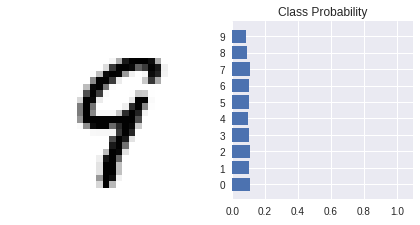

In [153]:
### resize the image into a 1D vector

images.resize_(64, 1, 784) 

### forward pass through the network

img_idx = 0
ps = model.forward(images[img_idx,:])
print("ps: ", ps)
print('')

img = images[img_idx] 
print("shape of img: ", img.shape) 
print('')

view_classify(img.view(1, 28, 28), ps)  

**Using 'nn.Sequential()**

**from PyTorch to build the same network by passing tensors**

**sequentially through the operations.**

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)



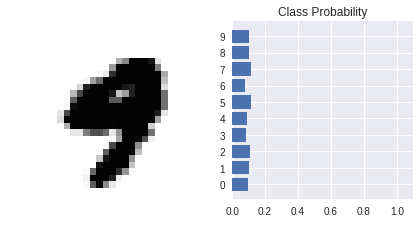

In [154]:
### set hyperparams 

input_size = 784
hidden_sizes = [128, 64]
output_size = 10 

### build a feed-forward network

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1)) 
print(model)  
print('')                      

### forward pass through the network 
### and display the output 

images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)                         

In [155]:
### print the weights in the input layer

print(model[0])
print('')
model[0].weight

Linear(in_features=784, out_features=128, bias=True)



Parameter containing:
tensor([[ 0.0022, -0.0037,  0.0093,  ..., -0.0269, -0.0047, -0.0287],
        [-0.0180,  0.0298,  0.0276,  ...,  0.0118,  0.0047, -0.0055],
        [ 0.0101,  0.0275,  0.0312,  ...,  0.0128, -0.0204, -0.0125],
        ...,
        [-0.0168,  0.0205,  0.0132,  ..., -0.0006, -0.0076,  0.0316],
        [ 0.0066, -0.0048,  0.0202,  ..., -0.0207, -0.0336, -0.0101],
        [-0.0001, -0.0269, -0.0064,  ..., -0.0257, -0.0328,  0.0205]],
       requires_grad=True)

In [156]:
### name the layers and operations in key-value pairs

model = nn.Sequential(OrderedDict([
                                 ('input_layer', nn.Linear(input_size, hidden_sizes[0])),
                                 ('relu1', nn.ReLU()),
                                 ('hidden_layer', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                                 ('relu2', nn.ReLU()),
                                 ('output_layer', nn.Linear(hidden_sizes[1], output_size)),
                                 ('softmax', nn.Softmax(dim=1))]))  
print(model)


Sequential(
  (input_layer): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (hidden_layer): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output_layer): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)


**Now I can access the layers and functions**

**either by index position or by key name.**

In [157]:
### use index position and key name 
### to access the input layer

print(model[0])
print(model.input_layer)



Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)


In [158]:
!pip freeze

absl-py==0.6.1
altair==2.2.2
astor==0.7.1
atomicwrites==1.2.1
attrs==18.2.0
beautifulsoup4==4.6.3
bleach==3.0.2
cachetools==3.0.0
certifi==2018.10.15
chardet==3.0.4
crcmod==1.7
cycler==0.10.0
cymem==2.0.2
cytoolz==0.9.0.1
decorator==4.3.0
defusedxml==0.5.0
dill==0.2.8.2
entrypoints==0.2.3
future==0.16.0
gast==0.2.0
google-api-core==1.5.2
google-api-python-client==1.6.7
google-auth==1.4.2
google-auth-httplib2==0.0.3
google-auth-oauthlib==0.2.0
google-cloud-bigquery==1.1.0
google-cloud-core==0.28.1
google-cloud-language==1.0.2
google-cloud-storage==1.8.0
google-cloud-translate==1.3.1
google-colab==0.0.1a1
google-resumable-media==0.3.1
googleapis-common-protos==1.5.5
grpcio==1.15.0
h5py==2.8.0
helper==2.4.2
httplib2==0.11.3
idna==2.6
ipykernel==4.6.1
ipython==5.5.0
ipython-genutils==0.2.0
Jinja2==2.10
joblib==0.13.0
jsonschema==2.6.0
jupyter-client==5.2.3
jupyter-core==4.4.0
Keras==2.2.4
Keras-Applications==1.0.6
Keras-Preprocessing==1.0.5
Markdown==3.0.1
MarkupSafe==1.1.0
matplotlib==2.1